<a href="https://colab.research.google.com/github/krishnaaxo/RBI_CASH_DEMAND_FORCASTING_TIMESERIES/blob/main/AutoARIMA_FBPROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import datetime
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [2]:
df= pd.read_excel('RBI.xlsx')
df['Date']= pd.to_datetime(df['Date'])

In [3]:

df.set_index('Date', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2020-06-01 to 2020-09-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [5]:
df.head()

,Value
Date,
2020-06-01,4764.812000
2020-06-02,4781.974663
2020-06-03,4426.915552
2020-06-04,4424.531824
2020-06-05,4321.009311


In [6]:
df.describe()

,Value
count,121.000000
mean,3947.881588
std,702.683669
min,1990.820000
25%,3595.760000
50%,3984.090000
75%,4476.890000
max,5165.170000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe021e9b610>],
      dtype=object)

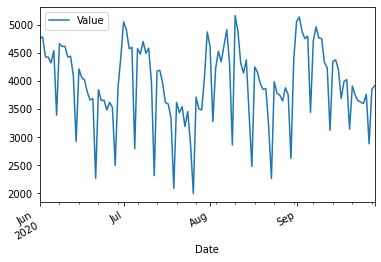

In [7]:
df.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe020dbbbd0>],
      dtype=object)

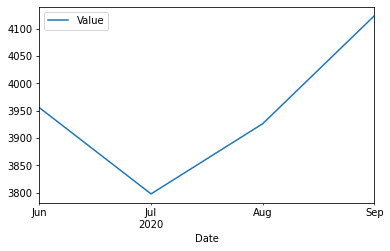

In [8]:
df.resample('M').mean().plot(subplots=True)

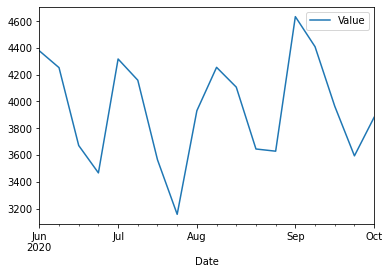

In [9]:
df.resample('W').mean().plot()

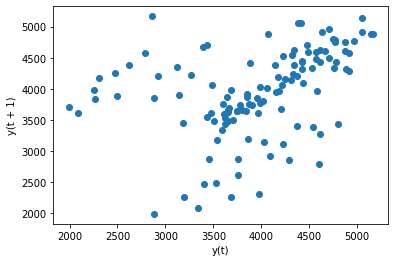

In [10]:
pd.plotting.lag_plot(df,lag=1)

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Value'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -5.198570901268631
p-value: 8.851341293954556e-06
Critial Values: {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}
Series is Stationary


# **Decompose**

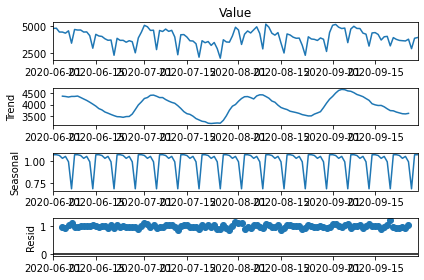

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
result = seasonal_decompose(df['Value'], model='mul') 
result.plot();

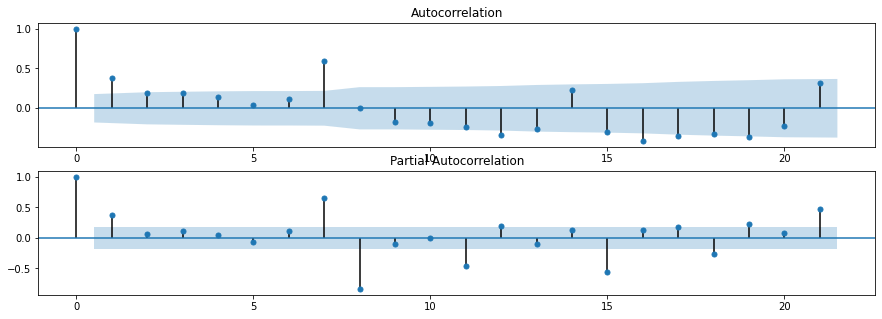

In [13]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig= plt.figure(figsize=(15,5))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df['Value'], ax= ax1)
ax2= fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(df['Value'], ax= ax2)
plt.show()

# **Auto_ARIMA**

In [14]:
!pip install pmdarima

In [15]:
import pmdarima as pm

model = pm.auto_arima(df['Value'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1915.534, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1932.666, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1914.306, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1909.330, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2353.112, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1919.164, Time=0.10 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1911.202, Time=0.67 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1921.835, Time=0.17 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1909.911, Time=0.25 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1906.864, Time=0.39 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1917.690, Time=0.05 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  121
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -943.313
Date:                                 Wed, 19 May 2021   AIC                           1898.627
Time:                                         16:33:36   BIC                           1915.402
Sample:                                              0   HQIC                          1905.440
                                                 - 121                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2326.0796    502.317      4.631      0.000    1341.556    3310.603
ar.L1          0.2106      0.096      2.199      0.028       0.023       0.398
ar.L2          0.1978      0.094      2.108      0.035       0.014       0.382
ma.S.L12      -0.5946      0.137     -4.331      0.000      -0.864      -0.325
ma.S.L24      -0.2287      0.134     -1.710      0.087      -0.491       0.033
sigma2      3.136e+05   5.91e+04      5.304      0.000    1.98e+05    4.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.23
Prob(Q):                              0.95   Prob(JB):                         0.04
Heteroskedasticity (H):               0.90   Skew:                            -0.53
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
df

,Value
Date,
2020-06-01,4764.812000
2020-06-02,4781.974663
2020-06-03,4426.915552
2020-06-04,4424.531824
2020-06-05,4321.009311
...,...
2020-09-25,3595.760000
2020-09-26,3760.840000
2020-09-27,2878.270000


In [18]:
train=df[(df.index.get_level_values(0) >= '2020-06-01') & (df.index.get_level_values(0) <= '2020-09-25')]
test=df[(df.index.get_level_values(0) > '2020-09-25')]

In [19]:
test.shape

(4, 1)

In [20]:
model.fit(train['Value'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [21]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [22]:
forecast

(array([3469.10904269, 3379.98677316, 3689.75332163, 3546.35565319]),
 array([[2192.48834642, 4745.72973896],
        [2075.94820056, 4684.02534575],
        [2350.08363757, 5029.42300569],
        [2202.16846379, 4890.54284258]]))

In [23]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])
forecast_df

,Prediction
Date,
2020-09-26,3469.109043
2020-09-27,3379.986773
2020-09-28,3689.753322
2020-09-29,3546.355653


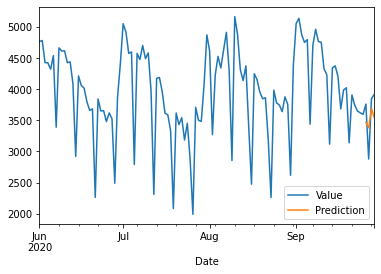

In [24]:
pd.concat([df['Value'],forecast_df],axis=1).plot()

In [25]:
forecast1=model.predict(n_periods=8, return_conf_int=True)

In [26]:
forecast_range=pd.date_range(start='2020-09-25', periods=8)

In [27]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

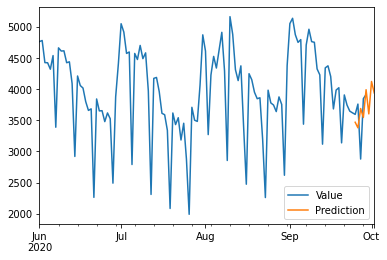

In [28]:
pd.concat([df['Value'],forecast1_df],axis=1).plot()

In [29]:
lower=pd.Series(forecast1[1][:, 0], index =forecast_range)
upper=pd.Series(forecast1[1][:, 1], index =forecast_range)

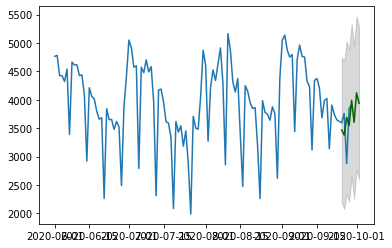

In [30]:
plt.plot(df['Value'])
plt.plot(forecast1_df, color='darkgreen')
plt.fill_between(forecast_range, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)

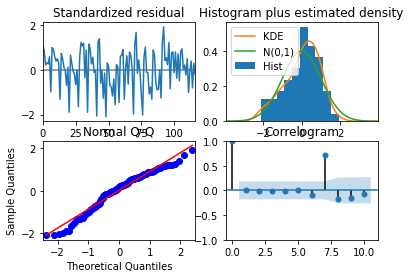

In [31]:
out=model.plot_diagnostics()

# **Facebook Prophet**

In [32]:
!pip install fbprophet

In [33]:
from fbprophet import Prophet

In [34]:
df

,Value
Date,
2020-06-01,4764.812000
2020-06-02,4781.974663
2020-06-03,4426.915552
2020-06-04,4424.531824
2020-06-05,4321.009311
...,...
2020-09-25,3595.760000
2020-09-26,3760.840000
2020-09-27,2878.270000


In [35]:
df_final=df.reset_index()[['Date','Value']].rename({'Date':'ds','Value':'y'}, axis='columns')
df_final


,ds,y
0,2020-06-01,4764.812000
1,2020-06-02,4781.974663
2,2020-06-03,4426.915552
3,2020-06-04,4424.531824
4,2020-06-05,4321.009311
...,...,...
116,2020-09-25,3595.760000
117,2020-09-26,3760.840000
118,2020-09-27,2878.270000
119,2020-09-28,3848.130000


In [36]:
train=df_final[(df_final['ds'] >= '2020-06-01') & (df_final['ds'] <= '2020-09-25')]
test=df_final[(df_final['ds'] > '2020-09-25')]

In [37]:
train.shape

(117, 2)

In [38]:
test.shape

(4, 2)

In [39]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [40]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
m.params

{'beta': array([[-0.13312068,  0.11163132,  0.07515329, -0.12086717,  0.00107322,
         -0.04966063,  0.05232233,  0.16125723, -0.02631919, -0.04886097,
         -0.16783094, -0.03678182,  0.17964302, -0.02660861,  0.09695753,
         -0.09220889, -0.14932847,  0.30776131,  0.01954543,  0.37984502,
         -0.05803455,  0.06693928,  0.07312624, -0.04447407, -0.06971392,
          0.00581781]]),
 'delta': array([[ 1.92473887e-09, -7.81315675e-09, -1.23581867e-09,
          2.23310158e-10,  1.47981492e-08, -9.61992250e-09,
          7.70841322e-09,  1.49194332e-09, -6.17209352e-09,
         -2.77397123e-10, -4.81959818e-09, -2.34630652e-08,
         -5.24853435e-09, -6.52742181e-09,  5.83222546e-09,
          1.63617660e-10, -9.26672617e-09,  1.74554877e-09,
          6.68432113e-09,  2.67872917e-08, -2.66998395e-09,
         -2.22536937e-09,  2.78390208e-09,  2.18245671e-09,
          7.55015478e-09]]),
 'k': array([[-0.14650532]]),
 'm': array([[0.86792157]]),
 'sigma_obs': array(

In [42]:
future = m.make_future_dataframe(periods=104)
future.tail()

,ds
216,2021-01-03
217,2021-01-04
218,2021-01-05
219,2021-01-06
220,2021-01-07


In [43]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
216,2021-01-03,4646.183500,4133.945147,5190.863941
217,2021-01-04,5969.368075,5435.011305,6452.429596
218,2021-01-05,5677.805987,5127.847819,6198.186946
219,2021-01-06,5254.887619,4732.451568,5780.450176
220,2021-01-07,4726.310803,4157.864268,5242.934710


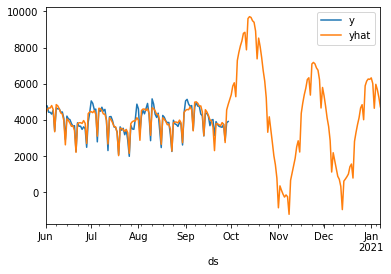

In [44]:
pd.concat([df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

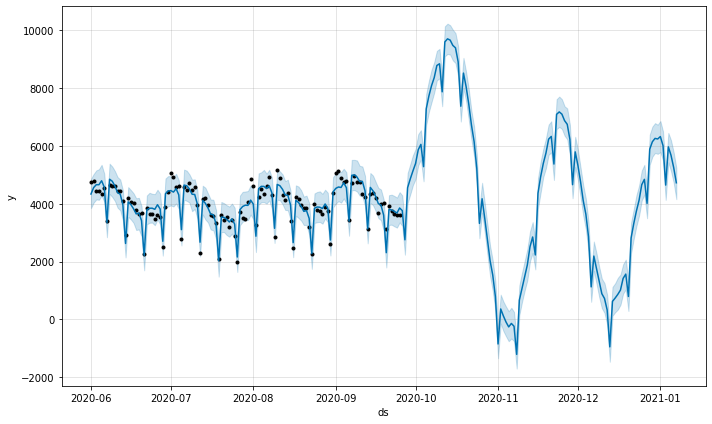

In [45]:
fig1 = m.plot(forecast)

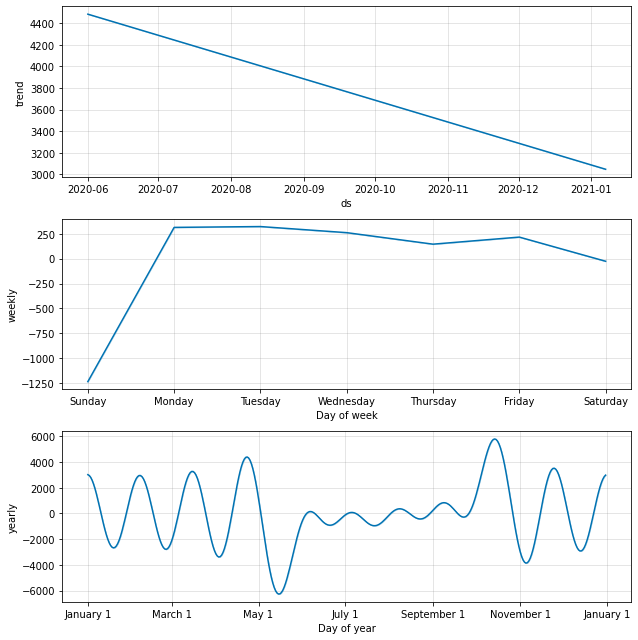

In [46]:
fig2 = m.plot_components(forecast)

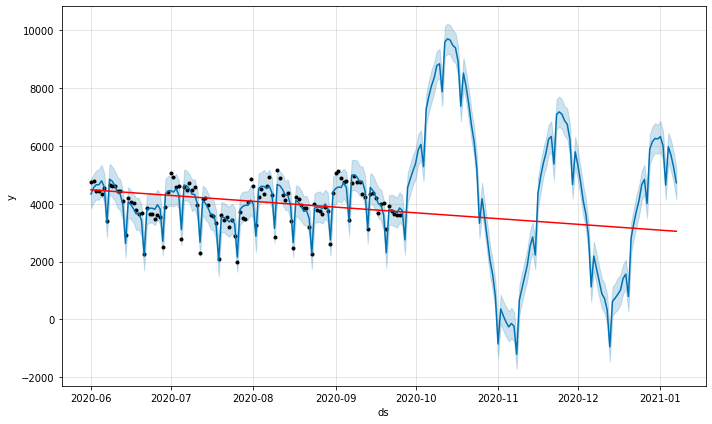

In [47]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [48]:
deltas = m.params['delta'].mean(0)
deltas

array([ 1.92473887e-09, -7.81315675e-09, -1.23581867e-09,  2.23310158e-10,
        1.47981492e-08, -9.61992250e-09,  7.70841322e-09,  1.49194332e-09,
       -6.17209352e-09, -2.77397123e-10, -4.81959818e-09, -2.34630652e-08,
       -5.24853435e-09, -6.52742181e-09,  5.83222546e-09,  1.63617660e-10,
       -9.26672617e-09,  1.74554877e-09,  6.68432113e-09,  2.67872917e-08,
       -2.66998395e-09, -2.22536937e-09,  2.78390208e-09,  2.18245671e-09,
        7.55015478e-09])

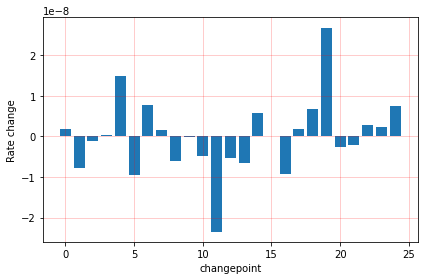

In [49]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

In [50]:
m.changepoints

4    2020-06-05
7    2020-06-08
11   2020-06-12
15   2020-06-16
18   2020-06-19
22   2020-06-23
26   2020-06-27
29   2020-06-30
33   2020-07-04
37   2020-07-08
40   2020-07-11
44   2020-07-15
48   2020-07-19
52   2020-07-23
55   2020-07-26
59   2020-07-30
63   2020-08-03
66   2020-08-06
70   2020-08-10
74   2020-08-14
77   2020-08-17
81   2020-08-21
85   2020-08-25
88   2020-08-28
92   2020-09-01
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


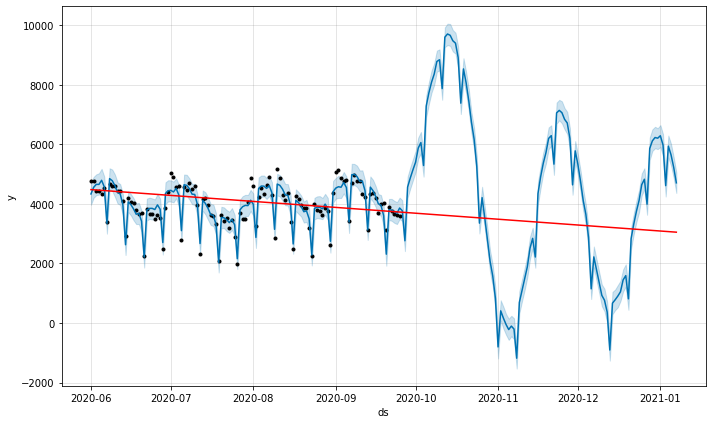

In [51]:
pro_change= Prophet(changepoint_range = 0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [52]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)